In [710]:
import sqlite3
import pandas as pd

In [711]:
conn = sqlite3.connect('chinook.db')
c = conn.cursor()

In [712]:
def get_columns(table):
    sql_command= 'PRAGMA table_info({})'.format(table)
    c.execute(sql_command)
    info = c.fetchall()
    columns = []
    for i in info:
        columns.append(i[1])
    return columns

def dataframe(sql,table):
    c.execute(sql)
    data = c.fetchall()
    return pd.DataFrame(data,columns=get_columns(table))

# Q1 Among our customers, who spend most?

            0             1      2
0       Frank        Harris  81.24
1        Mark       Philips  75.24
2      Helena          Holý  49.62
3     Richard    Cunningham  47.62
4        Luis         Rojas  46.62
5    Ladislav        Kovács  45.62
6        Hugh      O'Reilly  45.62
7       Julia       Barnett  43.62
8        Fynn    Zimmermann  43.62
9      Victor       Stevens  42.62
10     Astrid        Gruber  42.62
11      Terhi    Hämäläinen  41.62
12   Isabelle       Mercier  40.62
13  František   Wichterlová  40.62
14   Johannes  Van der Berg  40.62


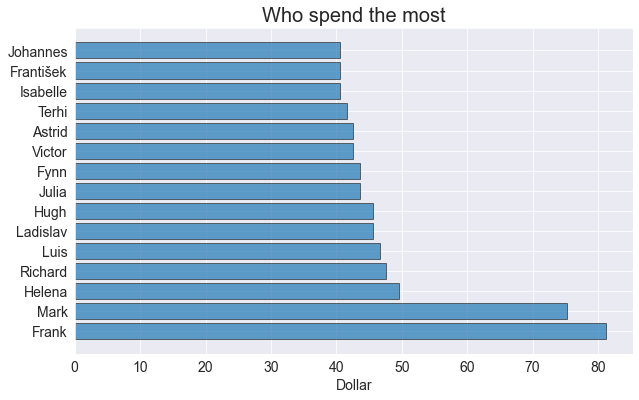

In [713]:
sql = """
SELECT c.firstname,c.lastname,SUM(i.total)
FROM customers c
INNER JOIN invoices i 
ON c.customerid = i.customerid
GROUP BY 1
ORDER BY SUM(i.total) DESC

"""
c.execute(sql)

df = pd.DataFrame(c.fetchall())
print(df.head(15))
plt.figure(figsize=(10,6))
plt.barh(df.head(15)[0],df.head(15)[2],alpha=0.7,edgecolor='.2')
plt.title('Who spend the most',fontsize=20)
plt.xlabel('Dollar')
plt.grid()

# Q2 Among our employees, who generate most revenue?

In [714]:
sql = """
SELECT e.firstname, e.lastname, SUM(temp.sum_total)
FROM 

    (SELECT c.firstname,c.lastname,SUM(i.total) AS sum_total,c.supportrepid
    FROM customers c
    INNER JOIN invoices i 
    ON c.customerid = i.customerid
    GROUP BY c.firstname) AS temp
    
INNER JOIN employees e
ON e.employeeid = temp.supportrepid
GROUP BY 1
ORDER BY SUM(temp.sum_total) DESC

"""
c.execute(sql)
df = pd.DataFrame(c.fetchall())
df

,0,1,2
0,Jane,Peacock,789.42
1,Margaret,Park,781.40
2,Steve,Johnson,757.78


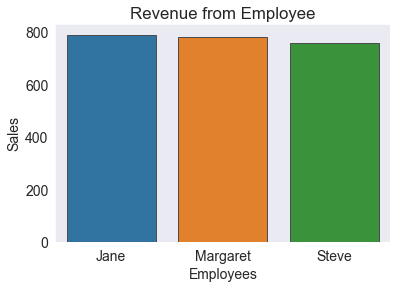

In [715]:
plt.figure(figsize=(6,4))
sns.barplot(x=0,y=2,data=df,edgecolor='.3')
plt.title('Revenue from Employee')
plt.xlabel('Employees')
plt.ylabel('Sales')
plt.show()

# Q3 Most Expensive track

In [716]:
sql ="""
    SELECT t.Name,i.unitprice AS price
    FROM tracks t
    INNER JOIN invoice_items i 
    ON t.trackid = i.trackid
    ORDER BY price DESC
    LIMIT 5
"""
c.execute(sql)
c.fetchall()

[('Occupation / Precipice', 1.99),
 ('Hero', 1.99),
 ('The Woman King', 1.99),
 ('Crossroads, Pt. 2', 1.99),
 ('Better Halves', 1.99)]

# Q4 Which invoicesID is the most expensive

In [717]:
sql ="""
SELECT invoiceid, SUM(unitprice)
FROM invoice_items
GROUP BY invoiceid
ORDER BY 2 DESC
LIMIT 5 
"""
c.execute(sql)
pd.DataFrame(c.fetchall(),columns=['invoiceid','totalprice'])

,invoiceid,totalprice
0,404,25.86
1,299,23.86
2,96,21.86
3,194,21.86
4,201,18.86


# Q5 Find out customers who have top 5 invoice

In [718]:
sql = """
SELECT c.firstname,c.lastname,temp2.invoiceid,temp2.totalprice
FROM
        (SELECT i.invoiceid,i.customerid, temp.totalprice
        FROM 
        (SELECT invoiceid, SUM(unitprice) AS totalprice
            FROM invoice_items
            GROUP BY invoiceid) AS temp

        INNER JOIN invoices i 
        ON i.invoiceid = temp.invoiceid) as temp2

INNER JOIN customers c 
ON c.customerid = temp2.customerid
ORDER BY temp2.totalprice DESC
LIMIT 5
"""

c.execute(sql)
df = pd.DataFrame(c.fetchall(),columns=['First','Last','invoiceid','totalprice'])
df
# get_columns('invoice_items')


,First,Last,invoiceid,totalprice
0,Helena,Holý,404,25.86
1,Richard,Cunningham,299,23.86
2,Ladislav,Kovács,96,21.86
3,Hugh,O'Reilly,194,21.86
4,Victor,Stevens,201,18.86


# Q6 Most popular artist

                    Artist  Unitsold
0              Iron Maiden       140
1                       U2       107
2                Metallica        91
3             Led Zeppelin        87
4  Os Paralamas Do Sucesso        45
5              Deep Purple        44
6            Faith No More        42
7                     Lost        41
8             Eric Clapton        40
9                   R.E.M.        39


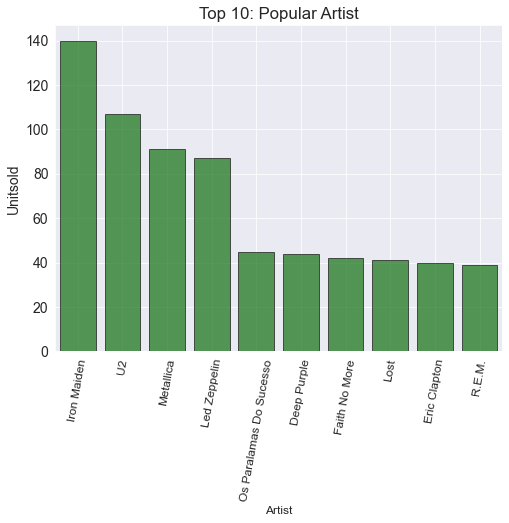

In [726]:
sql = """
SELECT temp2.artist_name, COUNT(2)
FROM 
        (SELECT temp.name AS artist_name,tracks.trackid,tracks.name
        FROM
            (SELECT artists.*,albums.title,albums.albumid
            FROM artists 
            INNER JOIN albums 
            ON artists.artistid = albums.artistid) AS temp
        INNER JOIN tracks
        ON tracks.albumid = temp.albumid) AS temp2
        
INNER JOIN invoice_items ON temp2.trackid = invoice_items.trackid
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
"""
c.execute(sql)
df  = pd.DataFrame(c.fetchall(),columns=['Artist','Unitsold'])
print(df)
sns.set_style('dark')
plt.figure(figsize=(8,6))
sns.barplot(x='Artist',y='Unitsold',data=df,edgecolor='0.1',alpha=0.7,color='green')
plt.title('Top 10: Popular Artist')
plt.xticks(rotation=80,fontsize=12)
plt.xlabel('Artist',fontsize=12)
plt.grid()
plt.show()

# Q7 Longest Songs

In [727]:
sql = """
SELECT *
FROM tracks
ORDER BY Milliseconds DESC
LIMIT 5
"""
dataframe(sql,'tracks')

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
1,3224,Through a Looking Glass,229,3,21,None,5088838,1059546140,1.99
2,3244,"Greetings from Earth, Pt. 1",253,3,20,None,2960293,536824558,1.99
3,3242,The Man With Nine Lives,253,3,20,None,2956998,577829804,1.99
4,3227,"Battlestar Galactica, Pt. 2",253,3,20,None,2956081,521387924,1.99


# Q8 Popular genres

In [728]:
sql = """
SELECT temp2.*,i.invoicedate
FROM
    (SELECT temp.genre, temp.trackname, i.invoiceid

    FROM
        (SELECT g.name AS genre, t.name AS trackname, t.trackid
        FROM genres g
        INNER JOIN tracks t ON t.genreid = g.genreid) AS temp
    INNER JOIN invoice_items i ON i.trackid = temp.trackid) AS temp2
LEFT JOIN invoices i ON i.invoiceid = temp2.invoiceid

    """
c.execute(sql)
df = pd.DataFrame(c.fetchall(),columns = ['Genre','Trackname','invoiceID','Date'])
df.head()

,Genre,Trackname,invoiceID,Date
0,Rock,Balls to the Wall,1,2009-01-01 00:00:00
1,Rock,Restless and Wild,1,2009-01-01 00:00:00
2,Rock,Put The Finger On You,2,2009-01-02 00:00:00
3,Rock,Inject The Venom,2,2009-01-02 00:00:00
4,Rock,Evil Walks,2,2009-01-02 00:00:00


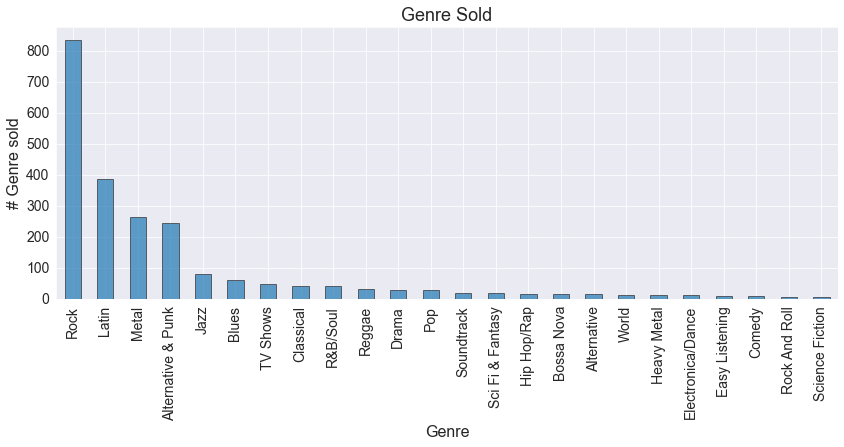

In [729]:
plt.figure(figsize=(14,5))
df.groupby('Genre')['Trackname'].count().sort_values(ascending=False).plot(kind='bar',alpha=0.7,edgecolor='0.2')
plt.title('Genre Sold',fontsize=18)
plt.ylabel('# Genre sold',fontsize=16)
plt.xlabel('Genre',fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [730]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_name'] = df['Date'].apply(lambda x: x.day_name())
# get top 10
topten_Genre = df.groupby('Genre')['Trackname'].count().sort_values(ascending=False).index[:10]

In [731]:
topten_genre_df = pd.DataFrame(columns=df.columns)
for item in topten_Genre:
    temp = df[df['Genre']==item]
    topten_genre_df = pd.concat([topten_genre_df,temp],axis=0)
topten_genre_df = topten_genre_df.groupby(['Day_name','Genre']).count().reset_index()

# reorder day name
dayofWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
temp = pd.DataFrame(columns=topten_genre_df.columns)
for day in dayofWeek:
    temp2 = topten_genre_df[topten_genre_df['Day_name']==day]
    temp = pd.concat([temp,temp2])
topten_genre_df = temp

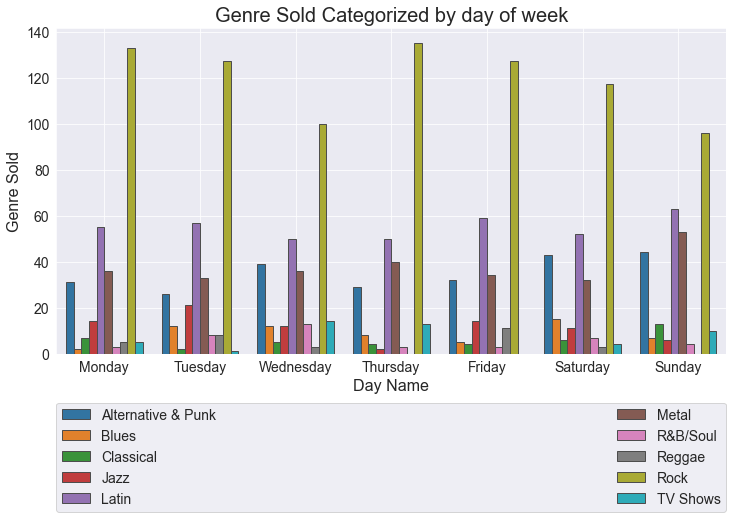

In [732]:
plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,6))
sns.barplot(x='Day_name',y='Trackname',hue='Genre',data=topten_genre_df,edgecolor='.3')
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)
plt.xlabel('Day Name',fontsize=16)
plt.ylabel('Genre Sold',fontsize=16)
plt.title('Genre Sold Categorized by day of week',fontsize=20)
plt.grid()
plt.show()

# Q9 Forcast number of tracks sold

In [736]:
sql = """
SELECT temp2.*,i.invoicedate
FROM
    (SELECT temp.genre, temp.trackname, i.invoiceid

    FROM
        (SELECT g.name AS genre, t.name AS trackname, t.trackid
        FROM genres g
        INNER JOIN tracks t ON t.genreid = g.genreid) AS temp
    INNER JOIN invoice_items i ON i.trackid = temp.trackid) AS temp2
LEFT JOIN invoices i ON i.invoiceid = temp2.invoiceid

    """
c.execute(sql)
df = pd.DataFrame(c.fetchall(),columns = ['Genre','Trackname','invoiceID','Date'])
df['Date'] = pd.to_datetime(df['Date'])
df['Year-Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
# df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')

ts = df.groupby(['Year-Month']).count().iloc[:,1]
print(ts)

Year-Month
2009-01    36
2009-02    38
2009-03    38
2009-04    38
2009-05    38
2009-06    38
2009-07    38
2009-08    38
2009-09    38
2009-10    38
2009-11    38
2009-12    38
2010-01    38
2010-02    38
2010-03    38
2010-04    38
2010-05    38
2010-06    38
2010-07    38
2010-08    38
2010-09    37
2010-10    38
2010-11    38
2010-12    38
2011-01    38
2011-02    38
2011-03    38
2011-04    38
2011-05    38
2011-06    38
2011-07    38
2011-08    38
2011-09    38
2011-10    38
2011-11    24
2011-12    38
2012-01    38
2012-02    38
2012-03    38
2012-04    38
2012-05    38
2012-06    38
2012-07    38
2012-08    38
2012-09    29
2012-10    38
2012-11    38
2012-12    38
2013-01    38
2013-02    28
2013-03    38
2013-04    34
2013-05    38
2013-06    38
2013-07    38
2013-08    38
2013-09    38
2013-10    38
2013-11    38
2013-12    38
Freq: M, Name: Trackname, dtype: int64


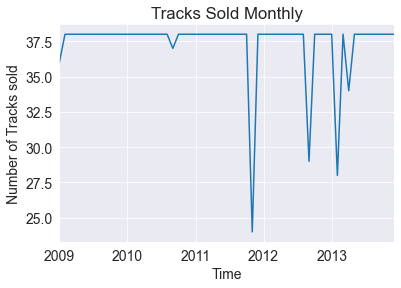

In [737]:
ts.plot()
plt.title('Tracks Sold Monthly')
plt.ylabel('Number of Tracks sold')
plt.xlabel('Time')
plt.grid()
plt.show()